In [1]:
# Package Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tarfile

In [11]:
# to extract the data sets from the download
tf = tarfile.open("collectionandqueries.tar")

In [12]:
tf.extractall()

There are several files within the downloaded tar file.
The collection.tsv file appears to by the sections of text.
The queries.train file seems to have the provided questions.
The qrels.train file has 4 columns of numbers. The first column is the query ID, and the third column is the passage ID.

## Passages

In [43]:
data = pd.read_csv("collection.tsv", delimiter = "\t", header = None)

In [44]:
data.head()

,0,1
0,0,The presence of communication amid scientific ...
1,1,The Manhattan Project and its atomic bomb help...
2,2,Essay on The Manhattan Project - The Manhattan...
3,3,The Manhattan Project was the name for a proje...
4,4,versions of each volume as well as complementa...


In [45]:
len(data)

8841823

In [49]:
sum(data[0].isnull())

0

In [51]:
sum(data[0].duplicated())

0

In [52]:
sum(data[1].isnull())

0

In [53]:
sum(data[1].duplicated())

0

There are no missing values or missing passages. This file lists passages and provides a passage ID to match with it.

## Questions

In [54]:
data = pd.read_csv("queries.train.tsv", delimiter = "\t", header = None)

In [55]:
data.head()

,0,1
0,121352,define extreme
1,634306,what does chattel mean on credit history
2,920825,what was the great leap forward brainly
3,510633,tattoo fixers how much does it cost
4,737889,what is decentralization process.


In [56]:
len(data)

808731

In [57]:
sum(data[0].isnull())

0

In [58]:
sum(data[0].duplicated())

0

In [59]:
sum(data[1].isnull())

0

In [60]:
sum(data[1].duplicated())

0

There are no missing values or missing passages. This file lists queries and provides a query ID to match with it.

There are substantially more passages than there are queries

## QRels Values

In [2]:
data = pd.read_csv("qrels.train.tsv", delimiter = "\t", header = None)

In [3]:
data.head()

,0,1,2,3
0,1185869,0,0,1
1,1185868,0,16,1
2,597651,0,49,1
3,403613,0,60,1
4,1183785,0,389,1


In [4]:
sum(data[0].isnull())

0

In [5]:
sum(data[0].duplicated())

29822

The query ID has a bunch of duplications. That suggests that each duplication will have several passage IDs?

In [6]:
sum(data[1].isnull())

0

In [7]:
sum(data[1].duplicated())

532760

In [8]:
data[1].value_counts()

0    532761
Name: 1, dtype: int64

Each value in this column is 0.

In [9]:
sum(data[2].isnull())

0

In [10]:
sum(data[2].duplicated())

16289

Given that there are duplicate values for the passage ID, that suggests it corresponds with multiple queries?

In [11]:
sum(data[3].isnull())

0

In [12]:
sum(data[3].duplicated())

532760

In [13]:
data[3].value_counts()

1    532761
Name: 3, dtype: int64

Each value in this column is 1.

Text(0,0.5,'Number of Queries')

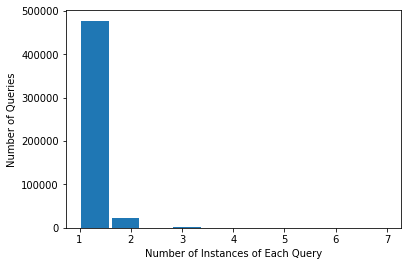

In [3]:
plt.hist(data[0].value_counts(), rwidth = 0.9)
plt.xlabel("Number of Instances of Each Query")
plt.ylabel("Number of Queries")

Text(0,0.5,'Number of Passages')

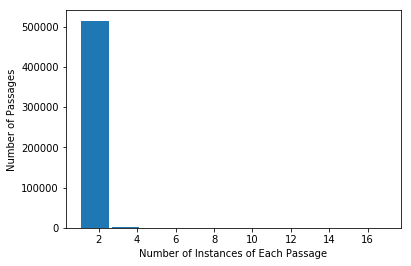

In [4]:
plt.hist(data[2].value_counts(), rwidth = 0.9)
plt.xlabel("Number of Instances of Each Passage")
plt.ylabel("Number of Passages")

In [8]:
data[2].value_counts()

483253     17
380235     15
148297     14
361429     14
158241     14
542968     14
1165304    13
1142386    13
429717     12
331378     11
98270      10
215281     10
296067     10
575071      9
76327       9
101307      9
359885      9
604997      9
279485      9
579954      9
3745        8
78210       8
2407430     8
694345      8
1058343     8
27343       8
27344       8
180678      8
185928      8
320448      8
           ..
2780271     1
6188703     1
638565      1
3792489     1
2737770     1
5569737     1
3743345     1
5836403     1
6895220     1
5848693     1
2845050     1
3667231     1
6901371     1
5860991     1
4373274     1
5734642     1
2023049     1
6213259     1
4328786     1
3075727     1
6168209     1
3016338     1
933525      1
927382      1
4326862     1
4090211     1
4083355     1
3045020     1
4095645     1
0           1
Name: 2, Length: 516472, dtype: int64